In [32]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot

In [33]:
gauges = pd.read_csv(
	'LamaH-dataset/A_basins_total_upstrm/1_attributes/Catchment_attributes.csv',
	delimiter = ';'
)
gauges.shape

(859, 63)

In [34]:
# randomly take 100 values, as said in slide 40
gauges = gauges.sample(100, random_state=42).sort_values(by='ID').reset_index()
gauges.head()

,index,ID,area_calc,elev_mean,elev_med,elev_std,elev_ran,slope_mean,mvert_dist,mvert_ang,...,gc_py_fra,gc_sc_fra,gc_sm_fra,gc_ss_fra,gc_su_fra,gc_va_fra,gc_vb_fra,gc_wb_fra,geol_perme,geol_poros
0,23,24,31.153,1480,1476,262,1074,314,6.4,344,...,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,-11.8,0.060
1,30,32,105.084,634,611,133,676,89,19.0,227,...,0.0,0.000,0.599,0.0,0.401,0.0,0.0,0.0,-12.9,0.202
2,39,41,65.206,1403,1337,268,1383,289,11.7,41,...,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,-11.8,0.060
3,49,51,727.403,2125,2200,463,2522,385,45.4,44,...,0.0,0.167,0.004,0.0,0.001,0.0,0.0,0.0,-12.6,0.019
4,63,65,204.351,2155,2200,469,2459,396,20.5,32,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,-14.1,0.010


In [35]:
valid_ids = gauges['ID'].array  # hold IDs of all gauges still left for faster calculations later
timeseries = [None] * (max(valid_ids)+1)  # create empty list to hold timeseries data for each gauge

total_nulls = 0

print('[id, nulls]')
for i, id in enumerate(valid_ids):
	timeseries[id] = pd.read_csv(
		'LamaH-dataset/A_basins_total_upstrm/2_timeseries/daily/ID_' + str(id) + '.csv',
		delimiter = ';'
	)
	
	temp_nulls = timeseries[id].isnull().sum().sum()

	# null value analysis
	print(
		f'[{id:03d}, {temp_nulls:03d}]', 
		end = '\n' if i % 10 == 9 else ''
	)
	
	total_nulls += temp_nulls

print(f'total nulls: {total_nulls}')


[id, nulls]
[024, 000][032, 000][041, 000][051, 000][065, 000][067, 000][068, 000][069, 000][080, 000][088, 000]
[098, 000][112, 000][122, 000][138, 000][139, 000][141, 000][171, 000][177, 000][201, 000][211, 000]
[214, 000][215, 000][230, 000][234, 000][247, 000][263, 000][268, 000][269, 000][289, 000][293, 000]
[295, 000][297, 000][299, 000][309, 000][314, 000][330, 000][331, 000][334, 000][341, 000][354, 000]
[366, 000][372, 000][387, 000][401, 000][402, 000][448, 000][456, 000][458, 000][472, 000][481, 000]
[489, 000][512, 000][516, 000][530, 000][539, 000][540, 000][546, 000][572, 000][575, 000][586, 000]
[587, 000][593, 000][598, 000][619, 000][623, 000][635, 000][641, 000][651, 000][652, 000][658, 000]
[661, 000][667, 000][675, 000][676, 000][683, 000][688, 000][691, 000][693, 000][695, 000][711, 000]
[723, 000][728, 000][733, 000][761, 000][766, 000][771, 000][780, 000][798, 000][809, 000][810, 000]
[831, 000][838, 000][839, 000][847, 000][848, 000][859, 000][869, 000][873, 000

In [36]:
print(timeseries[140])

None


In [37]:
# pick a table out for analysis
gaugeseries = timeseries[valid_ids[0]].copy()
gaugeseries.columns

Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
       '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
       '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'prec', 'volsw_123', 'volsw_4'],
      dtype='object')

In [38]:
print(f'year range: {min(gaugeseries["YYYY"])} - {max(gaugeseries["YYYY"])}')

year range: 1981 - 2019


In [39]:
# convert date columns into datetime for better plotting
gaugeseries.insert(0, 'date', pd.to_datetime(
	gaugeseries[['YYYY', 'MM', 'DD']].rename(columns={'YYYY': 'year', 'MM': 'month', 'DD': 'day'})
))


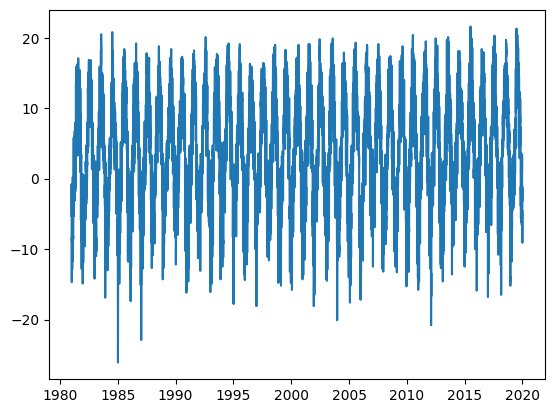

In [40]:
plot('date', '2m_temp_mean', data=gaugeseries)

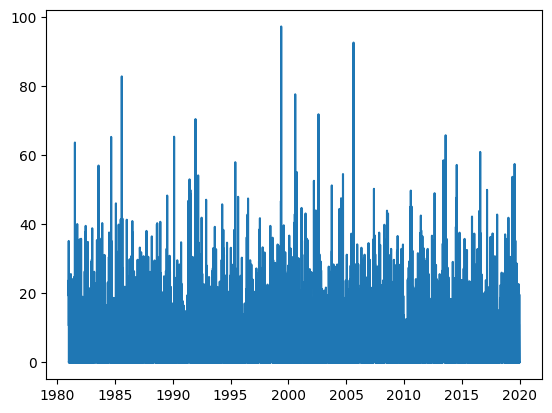

In [41]:
plot('date', 'prec', data=gaugeseries)
